# 

# Approximate derivatives with Julia

To get started, we load the `MTH229` package and a plotting package:

In [1]:
using MTH229
using Plots
plotly()

------------------------------------------------------------------------

### Quick background

Read about this material here: [Approximate derivatives in
julia](http://mth229.github.io/derivatives.html).

For the impatient, A secant line connecting points on the graph of
$f(x)$ between $x=c$ and $x = c+h$ has slope:

$$
\frac{f(c+h) - f(c)}{h}.
$$

The slope of the tangent line to the graph of $f(x)$ at the point
$(c,f(c))$ is given by taking the limit as $h$ goes to $0$:

$$
\lim_{h \rightarrow 0} \frac{f(c + h) - f(c)}{h}.
$$

The notation for this - when the limit exists - is $f'(c)$.

In general the derivative of a function $f(x)$ is the function $f'(x)$,
which returns the slope of the tangent line for each $x$ where it is
defined. Though finding derivatives of mathematical functions is a skill
that can be mastered, there are scenarios where approximating the value
is desirable.

#### Approximate derivatives

We can approximate the slope of the tangent line several ways. The
*forward [difference
quotient](https://en.wikipedia.org/wiki/Difference_quotient)* takes a
small value of $h$ and uses the value $(f(x+h) - f(x))/h$ as an
approximation to $f'(x)$.

For example, to estimate the derivative of $x^{\ln(x)}$ at $c=2$ with
`h=1e-6` we could have

In [3]:
f(x) = x^log(x)
c, h = 2, 1e-6
(f(c+h) - f(c)) / h

1.120685498845475

The above pattern finds the approximate derivative at the point $c$.
Though this can be pushed to return a function giving the derivative at
any point, we will use the more convenient solution described next for
finding the derivative as a function, when applicable.

#### Automatic derivatives

In mathematics we use the notation $f'(x)$ to refer to the function that
computes the derivative of $f(x)$ at a given $x$. The `MTH229` package
provides the same notation in `Julia`. In the background, this uses
*automatic differentiation*, as provided by the `ForwardDiff` package,
to compute the derivative. Automatic differentiation is a tad slower
than using a \* \[ \] hand-computed derivative, but as accurate as that,
and much easier and more accurate than using an *approximate
derivative*.

The `MTH229` package, using `ForwardDiff.derivative`, overloads the
default meaning of `'` allowing the usual notation for a derivative to
be used:

In [4]:
f(x) = sin(x)
f'(pi), f''(pi)

(-1.0, -1.2246467991473532e-16)

(The math notation is followed by `Julia`, in that `f'` itself returns a
function which evaluates the derivative, and `f'(pi)` first computes the
derivative and then evaluates that function at `pi`.)

#### Symbolic derivatives

Automatic differentiation gives accurate numeric values for first,
second, and even higher-order derivatives. It does not however, return
the expression one would get were these computed by hand. The `diff`
function from `SymPy` will find symbolic derivatives, similar to what is
achieved when differentiating “by hand,” though for many problems the
effort will be much less.

The `diff` function can be called with a symbolic expression and a
variable to differentiate in:

In [5]:
f(x) = exp(x^2) * sin(sqrt(x))
@syms x
diff(f(x), x)

Symbolic expressions can be generated by passing `x` into the function,
as illustrated, or written directly, as in
`diff(exp(x^2)*sin(sqrt(x)), x)`.

### Tangent lines

The tangent line to the graph of $f(x)$ at $x=c$ is given by
$y=f(c)+f'(c)(x-c)$. It is fairly easy to plot both the function and its
tangent line — we just need a function to compute the tangent line. Such
a function, `tangent(f,c)` is found in the `MTH229` package. This
function consumes a function (`f`) and a point (`c`) and returns a
**function** of `x` returning the `y` values of the tangent line.

In [6]:
f(x) = x^x
a,b = 1/2, 2
c = 1
sl = secant(f, a, b)
tl = tangent(f, c)

Function of `x` to compute the tangent line of `f` at `c`:
    f(c) + f'(c) * (x-c)

Here we see how to use it and the related `secant(f,a,b)` function:


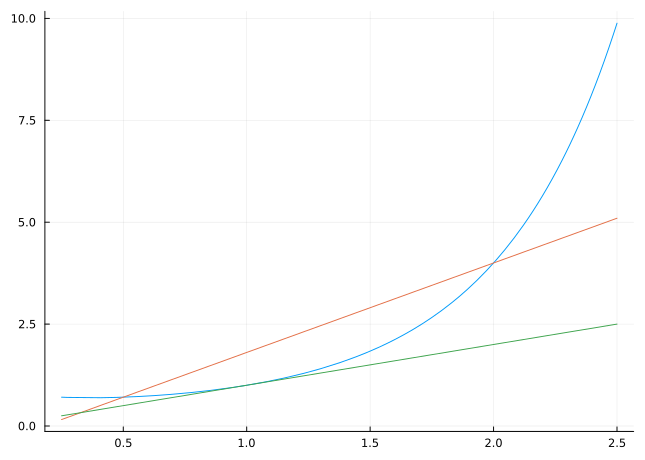

In [7]:
plot(f, 1/4, 2.5, legend=false)
plot!(sl)
plot!(tl)

Suppose the intersection point between the secant and tangent lines
between $0$ and $0.5$ is to be identified. This can be done with:

In [8]:
eqn(x) = tl(x) - sl(x)
fzero(eqn, 0, 0.5)

0.3267268967722361

#### Higher-order derivatives

Higher-order derivatives can be computed as well:

Automatic derivatives can be computed using the usual notation, e.g.,
`f''` to find $f''(x)$.

Higher-order symbolic derivatives can be computed by passing the order
to `diff` as a second argument, as in `diff(f(x), x, n)`.

For example, consider $f(x) = e^x \sin(x)$. We have:

In [9]:
f(x) = exp(x) * sin(x)
f''(3)

-39.769061688293974

As compared to the symbolic answer:

In [10]:
@syms x
fpp = diff(f(x), x, 2) # or diff(f(x), x, x)

and its numeric value at `3`:

In [11]:
float(fpp(3))    # make numeric

-39.76906168829398

------------------------------------------------------------------------

In [12]:
# Your commands go here